# World's Real Estate Data Analysis - Data Preprocessing

This notebook performs data preprocessing on the world's real estate dataset. The recommended preprocessing steps and order are:
1. Data Loading, Defining Data Types and Quality Check
2. Data Type Conversions
3. Handling Missing Values
4. Feature Engineering

# Data Loading, Defining Data Types and Quality Check

Let's start by loading the dataset and examining its basic properties:
- Shape (number of objects and attributes)
- First few records
- Last few records
- Data information (data types and non-null counts)
- Basic statistics
- Missing value analysis
- Check for duplicates

In [141]:
import pandas as pd

df = pd.read_csv("data/world_real_estate_data.csv")

In [142]:
df.shape

(147536, 14)

In [143]:
df.head()

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [144]:
df.tail()

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310 m²,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192 m²,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...
147533,"2 room apartment in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",NaN,NaN,NaN,3.0,2.0,2.0,NaN,84 m²,477146.0,https://realting.com/uploads/bigSlider/4ae/9d8...,https://realting.com/property-for-sale/turkey/...
147534,"Apartment in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819163.0,https://realting.com/uploads/bigSlider/164/7e6...,https://realting.com/property-for-sale/turkey/...
147535,"4 room apartment 140 m² in, Turkey",Turkey,Turkey,NaN,2.0,NaN,5.0,4.0,NaN,140 m²,NaN,939164.0,https://realting.com/uploads/bigSlider/fab/0eb...,https://realting.com/property-for-sale/turkey/...


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [146]:
df.isnull().sum()

title                              0
country                          130
location                         131
building_construction_year     82817
building_total_floors          79312
apartment_floor                92944
apartment_rooms                73358
apartment_bedrooms            110554
apartment_bathrooms            91563
apartment_total_area            5740
apartment_living_area         119824
price_in_USD                    2575
image                              0
url                                0
dtype: int64

In [147]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

apartment_living_area         81.216788
apartment_bedrooms            74.933576
apartment_floor               62.997506
apartment_bathrooms           62.061463
building_construction_year    56.133418
building_total_floors         53.757727
apartment_rooms               49.722102
apartment_total_area           3.890576
price_in_USD                   1.745337
location                       0.088792
country                        0.088114
title                          0.000000
image                          0.000000
url                            0.000000
dtype: float64

In [148]:
df.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
count,64719.000000,68224.000000,54592.000000,74178.000000,36982.000000,55973.000000,1.449610e+05
mean,1996.921754,8.575692,5.791709,2.572097,2.289222,1.364229,4.121722e+05
std,157.527635,8.356781,5.541368,1.319545,18.276913,0.745019,8.420984e+05
min,1.000000,-1.000000,-2.000000,-1.000000,-1.000000,1.000000,0.000000e+00
25%,2004.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.054200e+05
50%,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.902120e+05
75%,2024.000000,14.000000,8.000000,3.000000,3.000000,2.000000,3.989300e+05
max,2316.000000,124.000000,202.000000,124.000000,2009.000000,43.000000,3.060283e+07


In [149]:
df.describe(include='all')

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
count,147536,147406,147405,64719.000000,68224.000000,54592.000000,74178.000000,36982.000000,55973.000000,141796,27712,1.449610e+05,147536,147536
unique,78292,27,7445,NaN,NaN,NaN,NaN,NaN,NaN,1492,641,NaN,113753,147536
top,"1 room apartment 24 m² in poselenie Sosenskoe,...",Turkey,"Mediterranean Region, Sekerhane Mahallesi, Ala...",NaN,NaN,NaN,NaN,NaN,NaN,100 m²,30 m²,NaN,https://realting.com/uploads/bigSlider/9b9/e2b...,https://realting.com/property-for-sale/turkey/...
freq,486,25724,7244,NaN,NaN,NaN,NaN,NaN,NaN,2468,888,NaN,1219,1
mean,NaN,NaN,NaN,1996.921754,8.575692,5.791709,2.572097,2.289222,1.364229,NaN,NaN,4.121722e+05,NaN,NaN
std,NaN,NaN,NaN,157.527635,8.356781,5.541368,1.319545,18.276913,0.745019,NaN,NaN,8.420984e+05,NaN,NaN
min,NaN,NaN,NaN,1.000000,-1.000000,-2.000000,-1.000000,-1.000000,1.000000,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,2004.000000,2.000000,2.000000,2.000000,1.000000,1.000000,NaN,NaN,1.054200e+05,NaN,NaN
50%,NaN,NaN,NaN,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,NaN,NaN,1.902120e+05,NaN,NaN
75%,NaN,NaN,NaN,2024.000000,14.000000,8.000000,3.000000,3.000000,2.000000,NaN,NaN,3.989300e+05,NaN,NaN


In [150]:
df.duplicated().sum()

0

In [151]:
df['url'].duplicated().sum()

0

In [152]:
cleaned_df = df.copy()

# Data Type Conversion

Clean and standardize area-related columns:
- Convert area values from string to numeric format
- Remove 'm²' suffix
- Handle different decimal separators (comma vs period)
- Remove whitespace
- Convert to numeric values

Convert other columns:
- Objects that are just strings
- Columns with repeated nominal values can be set as categories
- Numeric columns that are already numeric but need nullable integer type

In [153]:
cleaned_df["apartment_total_area"] = (
    cleaned_df["apartment_total_area"]
    .astype(str)
    .str.replace("m²", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace(r"\s+", "", regex=True)
    .str.strip()
)

cleaned_df["apartment_total_area"] = pd.to_numeric(cleaned_df["apartment_total_area"], errors="coerce")

In [154]:
cleaned_df["apartment_living_area"] = (
    cleaned_df["apartment_living_area"]
    .astype(str)
    .str.replace("m²", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.replace(r"\s+", "", regex=True)
    .str.strip()
)

cleaned_df["apartment_living_area"] = pd.to_numeric(cleaned_df["apartment_living_area"], errors="coerce")

In [155]:
text_cols = ["title", "image", "url"]

for col in text_cols:
    cleaned_df[col] = cleaned_df[col].astype("string").str.strip()

In [156]:
print(df['country'].nunique())
print(df['location'].nunique())

27
7445


In [157]:
categorical_cols = ['country', 'location']
cleaned_df[categorical_cols] = cleaned_df[categorical_cols].astype('category')

In [158]:
int_cols = [
    'building_construction_year',
    'building_total_floors',
    'apartment_floor',
    'apartment_rooms',
    'apartment_bedrooms',
    'apartment_bathrooms'
]

for col in int_cols:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce').astype('Int64')

In [159]:
cleaned_df.dtypes

title                         string[python]
country                             category
location                            category
building_construction_year             Int64
building_total_floors                  Int64
apartment_floor                        Int64
apartment_rooms                        Int64
apartment_bedrooms                     Int64
apartment_bathrooms                    Int64
apartment_total_area                 float64
apartment_living_area                float64
price_in_USD                         float64
image                         string[python]
url                           string[python]
dtype: object

# Handle Missing Values

Handle Missing Rooms
- Extract numbers from the title column using text patterns like "2 bedroom" or "3 rooms"
- Fill apartment_bedrooms and apartment_rooms where possible from detected values
- For remaining missing apartment_rooms, use the median value of the column
- Ensure all rows have valid values for bedrooms and rooms

In [160]:
import re

def extract_room_info(title):
    bedrooms = None
    rooms = None

    bed_match = re.search(r'(\d+)\s*(bedroom|bedrooms|br)', title, re.IGNORECASE)
    if bed_match:
        bedrooms = int(bed_match.group(1))

    room_match = re.search(r'(\d+)\s*(?<!bed)room[s]?', title, re.IGNORECASE)
    if room_match:
        rooms = int(room_match.group(1))

    return bedrooms, rooms


for i, title in enumerate(cleaned_df["title"]):
    bed, room = extract_room_info(title)

    if pd.isna(cleaned_df.at[i, "apartment_bedrooms"]) and bed is not None:
        cleaned_df.at[i, "apartment_bedrooms"] = bed

    if pd.isna(cleaned_df.at[i, "apartment_rooms"]) and room is not None:
        cleaned_df.at[i, "apartment_rooms"] = room



In [161]:
cleaned_df["apartment_rooms"] = cleaned_df["apartment_rooms"].fillna(
    cleaned_df["apartment_rooms"].median()
)

Handle Missing Price
- Fills any remaining missing apartment_rooms with the column median
- Ensures all listings have a valid room count

In [162]:
cleaned_df.dropna(subset=['price_in_USD'], inplace=True)

Handle Missing Country
- Create a list of known countries from the country column
- Use a regex pattern to search for country names in title, location, and url columns
- Fill missing country values with detected matches in a temporary column
- Replace NaN in country with the detected values and drop the temporary column
- Ensure all rows have valid country information

In [163]:
country_list = cleaned_df['country'].dropna().unique()

country_pattern = re.compile('|'.join(country_list), flags=re.IGNORECASE)

def extract_country(row):
    for field in ['title', 'location', 'url']:
        text = str(row[field])
        match = country_pattern.search(text)
        if match:
            return match.group(0).title()
    return None

missing_mask = cleaned_df['country'].isna()
cleaned_df.loc[missing_mask, 'detected_country'] = cleaned_df[missing_mask].apply(extract_country, axis=1)

cleaned_df['country'] = cleaned_df['country'].fillna(cleaned_df['detected_country'])
cleaned_df.drop(columns=['detected_country'], inplace=True)


Handle Missing Location
- Groups listings by country
- Fills missing location values with the most common location (mode) within the same country
- If no mode exists (e.g., all values missing), fills with "Unknown"
- Ensures all listings have a value in the location column

In [164]:
cleaned_df['location'] = (
    cleaned_df.groupby('country', observed=False)['location']
    .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
)

Handle Missing Building Construction Year
- Groups listings by country and fills missing building_construction_year with the median year within that country
- If a country has no available year data, leaves the group unchanged
- After group-wise filling, any remaining missing values are filled with the overall median
- Ensures all listings have a numeric value for construction year

In [165]:
def fill_year(group):
    if group.notna().any():
        return group.fillna(group.median())
    else:
        return group

cleaned_df['building_construction_year'] = (
    cleaned_df.groupby('country', observed=False)['building_construction_year']
    .transform(fill_year)
)

cleaned_df['building_construction_year'] = cleaned_df['building_construction_year'].fillna(
    cleaned_df['building_construction_year'].median()
)

In [166]:
cleaned_df.isna().sum()

title                              0
country                            0
location                           0
building_construction_year         0
building_total_floors          77376
apartment_floor                90832
apartment_rooms                    0
apartment_bedrooms            104514
apartment_bathrooms            89173
apartment_total_area            4706
apartment_living_area         117769
price_in_USD                       0
image                              0
url                                0
dtype: int64

# Feature Extraction

Extract property types from listing titles using regex patterns:
- Identify common property types (apartment, house, villa, etc.)
- Create a new 'property_type' column
- Handle edge cases and refine categorization
- Analyze distribution of property types

In [167]:
def extract_property_type(title):
    title_lower = str(title).lower()

    patterns = {
        'apartment': r'\b(apartment|apartments|flat|flats|condo|condos|duplex|duplexes|penthouse|penthouses)\b',
        'studio': r'\bstudio[s]?\b',
        'house': r'\b(house|houses|mansion|mansions|bungalow|bungalows|cottage|cottages|townhouse|townhouses)\b',
        'villa': r'\bvilla[s]?\b',
        'land': r'\b(plot|plots|land)\b',
        'office': r'\boffice[s]?\b',
        'commercial': r'\b(commercial|shop|shops|store|stores|warehouse|warehouses)\b'
    }

    for prop_type, pattern in patterns.items():
        if re.search(pattern, title_lower):
            return prop_type
    return 'other'

cleaned_df['property_type'] = cleaned_df['title'].apply(extract_property_type)
cleaned_df['property_type'].value_counts()

property_type
apartment    97212
house        37545
villa        10026
other          178
Name: count, dtype: int64

In [168]:
cols = cleaned_df.columns.tolist()

cols.remove('property_type')

title_index = cols.index('title') + 1
cols.insert(title_index, 'property_type')

cleaned_df = cleaned_df[cols]

cleaned_df.head()

,title,property_type,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,apartment,Turkey,"Mediterranean Region, Turkey",2023,5,1,3,2,2,120.0,110.0,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",villa,Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021,2,<NA>,4,<NA>,<NA>,500.0,480.0,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",apartment,Turkey,"Mediterranean Region, Antalya, Turkey",2023,5,2,2,1,1,65.0,60.0,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",apartment,Thailand,"Chon Buri Province, Pattaya, Thailand",2020,15,5,2,1,1,NaN,40.0,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",apartment,Thailand,"Chon Buri Province, Pattaya, Thailand",2026,8,3,3,2,1,NaN,36.0,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [169]:
other_listings = cleaned_df[cleaned_df['property_type'] == 'other']
other_listings[['title', 'country', 'location', 'apartment_rooms', 'apartment_floor', 'apartment_bedrooms', 'apartment_bathrooms']]

,title,country,location,apartment_rooms,apartment_floor,apartment_bedrooms,apartment_bathrooms
4101,"Room 4 bedrooms 277 m² in Turkey, Turkey",Turkey,Turkey,5,<NA>,4,4
5861,"Room 3 bedrooms 235 m² in Turkey, Turkey",Turkey,Turkey,4,<NA>,3,3
6840,"Room 3 bedrooms in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",4,<NA>,3,3
7047,"Room 1 bedroom 91 m² in Turkey, Turkey",Turkey,Turkey,2,<NA>,1,1
15294,"Room 2 bedrooms 170 m² in Turkey, Turkey",Turkey,Turkey,3,<NA>,2,2
...,...,...,...,...,...,...,...
140970,"54 m² in Suhobezvodnoe, Russia",Russia,"Suhobezvodnoe, Volga Federal District, Semenov...",3,<NA>,<NA>,<NA>
140971,"76 m² in Sergach, Russia",Russia,"Sergach, Volga Federal District, Sergachsky Di...",3,<NA>,<NA>,<NA>
141088,"169 m² in Nizhny Novgorod, Russia",Russia,"Volga Federal District, Nizhny Novgorod, Russia",3,<NA>,<NA>,<NA>
144199,"Room 4 rooms 97 m² in Tashkent, Uzbekistan",Uzbekistan,"Tashkent, Uzbekistan",4,2,<NA>,<NA>


# Handle more missing values

In [170]:
cleaned_df.isnull().sum()

title                              0
property_type                      0
country                            0
location                           0
building_construction_year         0
building_total_floors          77376
apartment_floor                90832
apartment_rooms                    0
apartment_bedrooms            104514
apartment_bathrooms            89173
apartment_total_area            4706
apartment_living_area         117769
price_in_USD                       0
image                              0
url                                0
dtype: int64

Handle Missing Apartment Total Area
- Groups listings by property_type
- Fills missing apartment_total_area values with the median area for that property type
- Ensures all listings have a numeric value for total area

In [171]:
cleaned_df.groupby('property_type')[['apartment_total_area']].median()

,apartment_total_area
property_type,
apartment,70.0
house,145.0
other,126.0
villa,260.0


In [172]:
cleaned_df["apartment_total_area"] = cleaned_df.groupby("property_type")["apartment_total_area"] \
                                              .transform(lambda x: x.fillna(x.median()))

Handle Missing Apartment Bedrooms and Bathrooms
- Fill missing apartment_bedrooms and apartment_bathrooms based on property type
- Use the median value for the same property type whenever available
- If a property type has no data for a column, leave it as missing for now
- After group-wise filling, fill any remaining missing values with the overall median
- Ensures all listings have numeric values for bedrooms and bathrooms

In [173]:
cleaned_df.groupby('property_type')[['apartment_rooms',
'apartment_bedrooms', 'apartment_bathrooms']].median()

,apartment_rooms,apartment_bedrooms,apartment_bathrooms
property_type,,,
apartment,3.0,2.0,1.0
house,3.0,3.0,<NA>
other,3.0,3.0,2.0
villa,4.0,7.0,<NA>


In [174]:
cleaned_df.groupby('property_type')[['apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms']].agg(['count', 'median'])


apartment_rooms        apartment_bedrooms         \
                        count median              count median   
property_type                                                    
apartment               97212    3.0              37291    2.0   
house                   37545    3.0               2727    3.0   
other                     178    3.0                 87    3.0   
villa                   10026    4.0                342    7.0   

              apartment_bathrooms         
                            count median  
property_type                             
apartment                   55775    1.0  
house                           0   <NA>  
other                          13    2.0  
villa                           0   <NA>

In [175]:
import numpy as np

for col in ['apartment_bedrooms', 'apartment_bathrooms']:
    cleaned_df[col] = cleaned_df.groupby('property_type')[col].transform(
        lambda x: x.fillna(x.median() if not x.isna().all() else np.nan)
    )

for col in ['apartment_bedrooms', 'apartment_bathrooms']:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())

cleaned_df.isnull().sum()

cleaned_df[['apartment_bedrooms', 'apartment_bathrooms']].describe()


,apartment_bedrooms,apartment_bathrooms
count,144961.0,144961.0
mean,2.697312,1.141335
std,9.319174,0.496082
min,-1.0,1.0
25%,2.0,1.0
50%,2.0,1.0
75%,3.0,1.0
max,2009.0,43.0


In [176]:
cleaned_df.drop(columns=['image', 'url', 'apartment_living_area'], inplace=True, errors='ignore')

Handle Missing Total Floors and Apartment Floor
- Fill missing total floors of the building (building_total_floors) by median value within each property type
- Fill missing apartment floor (apartment_floor) similarly, using the median for that property type
- Ensure that the apartment floor does not exceed the total floors of the building:

In [177]:
cleaned_df['building_total_floors'] = cleaned_df.groupby('property_type')['building_total_floors'] \
                                 .transform(lambda x: x.fillna(x.median()))

cleaned_df['apartment_floor'] = cleaned_df.groupby('property_type')['apartment_floor'] \
                          .transform(lambda x: x.fillna(x.median()))

cleaned_df['apartment_floor'] = np.minimum(cleaned_df['apartment_floor'], cleaned_df['building_total_floors'])


print(cleaned_df[['property_type', 'building_total_floors', 'apartment_floor']].info())
print(cleaned_df[['property_type', 'building_total_floors', 'apartment_floor']].head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 144961 entries, 0 to 147535
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   property_type          144961 non-null  object
 1   building_total_floors  144961 non-null  Int64 
 2   apartment_floor        144961 non-null  Int64 
dtypes: Int64(2), object(1)
memory usage: 4.7+ MB
None
  property_type  building_total_floors  apartment_floor
0     apartment                      5                1
1         villa                      2                1
2     apartment                      5                2
3     apartment                     15                5
4     apartment                      8                3
5     apartment                      9                4
6     apartment                      2                2
7     apartment                      8                2
8     apartment                      9                4
9     apartment     

In [178]:
cleaned_df.isnull().sum()

title                         0
property_type                 0
country                       0
location                      0
building_construction_year    0
building_total_floors         0
apartment_floor               0
apartment_rooms               0
apartment_bedrooms            0
apartment_bathrooms           0
apartment_total_area          0
price_in_USD                  0
dtype: int64

# Dimension Reduction
- Principal Components Analysis (PCA)

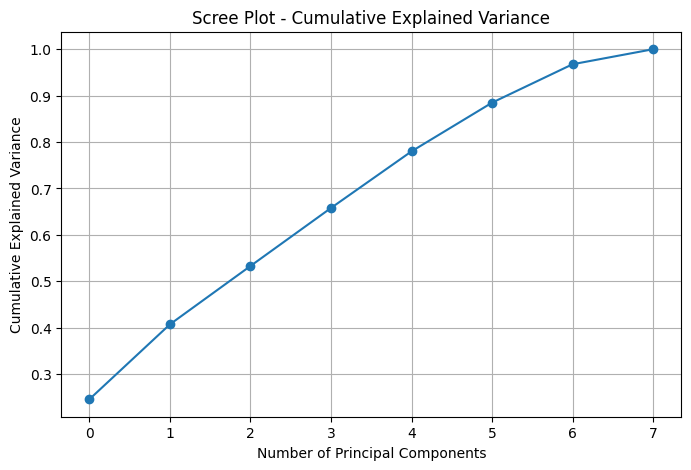

,Principal Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.245922,0.245922
1,PC2,0.161432,0.407354
2,PC3,0.125646,0.533000
3,PC4,0.124993,0.657993
4,PC5,0.121974,0.779967
5,PC6,0.104888,0.884855
6,PC7,0.082777,0.967632
7,PC8,0.032368,1.000000


In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

numeric_df = cleaned_df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

pca_table = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': np.cumsum(explained_variance)
})


pca_table.head(10)

In [180]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

n_components = 6

pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=numeric_df.columns
)

loadings = loadings.round(3)

print("Factor Pattern (Loadings) Matrix:")
display(loadings)

strong_loadings = loadings.where(abs(loadings) > 0.4)
strong_loadings.dropna(how='all', inplace=True)

print("\nStrong Loadings (|value| > 0.4):")
display(strong_loadings)


Factor Pattern (Loadings) Matrix:


,PC1,PC2,PC3,PC4,PC5,PC6
building_construction_year,0.039,0.037,0.939,-0.107,-0.277,0.164
building_total_floors,0.615,0.271,0.006,0.000,0.024,-0.164
apartment_floor,0.608,0.247,0.002,0.000,0.047,-0.212
apartment_rooms,-0.410,0.426,-0.018,0.003,-0.089,-0.140
apartment_bedrooms,-0.112,0.182,0.262,-0.054,0.938,0.040
apartment_bathrooms,0.032,0.596,-0.181,0.013,-0.100,0.751
apartment_total_area,-0.002,0.005,0.118,0.993,0.022,0.010
price_in_USD,-0.262,0.543,0.055,-0.001,-0.150,-0.561



Strong Loadings (|value| > 0.4):


,PC1,PC2,PC3,PC4,PC5,PC6
building_construction_year,NaN,NaN,0.939,NaN,NaN,NaN
building_total_floors,0.615,NaN,NaN,NaN,NaN,NaN
apartment_floor,0.608,NaN,NaN,NaN,NaN,NaN
apartment_rooms,-0.410,0.426,NaN,NaN,NaN,NaN
apartment_bedrooms,NaN,NaN,NaN,NaN,0.938,NaN
apartment_bathrooms,NaN,0.596,NaN,NaN,NaN,0.751
apartment_total_area,NaN,NaN,NaN,0.993,NaN,NaN
price_in_USD,NaN,0.543,NaN,NaN,NaN,-0.561


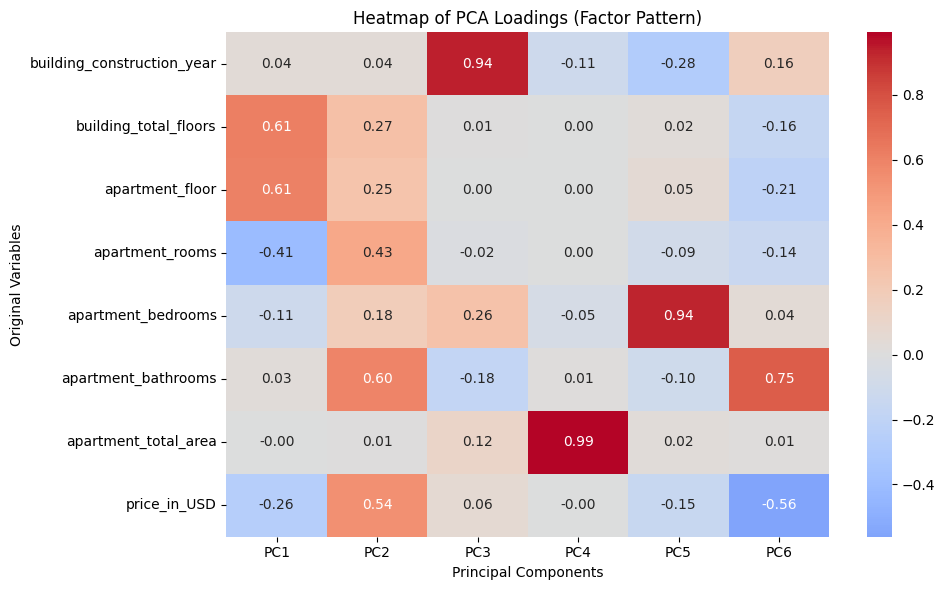

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Heatmap of PCA Loadings (Factor Pattern)")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.tight_layout()
plt.show()

# Feature Engineering
- Compute a derived feature: price per square meter for each listing

In [182]:
cleaned_df['price_per_m2'] = cleaned_df['price_in_USD'] / cleaned_df['apartment_total_area']

In [183]:
country_summary = (
    cleaned_df.groupby('country', observed=False)
    .agg(
        avg_area_m2=('apartment_total_area', 'mean'),
        avg_price_per_m2=('price_per_m2', 'mean'),
        total_listings=('price_in_USD', 'count')
    )
    .reset_index()
    .sort_values(by='avg_price_per_m2', ascending=False)
)

print("\nAverage Property Prices by Country")
print(country_summary.head(10))


Average Property Prices by Country
           country  avg_area_m2  avg_price_per_m2  total_listings
12           Italy  1182.772304      12721.175991            3004
18        Portugal   601.962910       7733.520487            2103
24             UAE   193.474570       7280.483601            2674
21           Spain   282.576086       5352.857577           14937
2          Austria  8877.801724       4699.650042             232
1        Australia   120.000000       4658.333333               1
6   Czech Republic    74.048140       4486.978927            1371
15      Montenegro  3889.245634       4142.611403           10308
4          Croatia   321.710123       4005.376885            2025
25   United States   399.451691       3819.512113             414


# Discretization
- Divide price_in_USD into three quantiles (Low, Medium, High) using pd.qcut
- Assign a categorical label to each listing based on its price
- Summarize the number of listings per price category and country

In [184]:
import pandas as pd

cleaned_df['price_category'] = pd.qcut(
    cleaned_df['price_in_USD'], q=3, labels=['Low', 'Medium', 'High']
)

price_cat_summary = (
    cleaned_df.groupby(['country', 'price_category'], observed=False)
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

print(price_cat_summary.head(27))

price_category          country    Low  Medium  High
0                       Armenia      0      98    12
1                     Australia      0       0     1
2                       Austria      0      59   173
3                       Belarus  12255    1242   285
4                       Croatia     73     673  1279
5                        Cyprus     28      41    10
6                Czech Republic    268     689   414
7                       Finland    309     322   185
8                       Georgia   2732     457   102
9                        Greece   1137    3127  8111
10                      Hungary   9955    8895  3488
11                    Indonesia      4      54    44
12                        Italy    197     447  2360
13                       Latvia    182     665  1447
14                    Lithuania   1225    1000   342
15                   Montenegro   1604    3546  5158
16              Northern Cyprus    278     360   107
17                       Poland    144     589

# Binarization

Convert the building age into a binary feature:
- 1 → building constructed in the last 10 years
- 0 → older buildings

In [185]:
cleaned_df['is_new_building'] = (2025 - cleaned_df['building_construction_year'] <= 10).astype(int)

new_building_avg = (
    cleaned_df.groupby(['country', 'is_new_building'], observed=False)['price_per_m2']
    .mean()
    .reset_index()
)

price_compare = new_building_avg.pivot(index='country', columns='is_new_building', values='price_per_m2')
price_compare.columns = ['Old_Building_Price_m2', 'New_Building_Price_m2']
price_compare = price_compare.dropna().sort_values(by='New_Building_Price_m2', ascending=False)

print("Average Price per m²: New vs. Old Buildings by Country")
print(price_compare.head(10))

Average Price per m²: New vs. Old Buildings by Country
            Old_Building_Price_m2  New_Building_Price_m2
country                                                 
Portugal              3464.621606            7818.401600
UAE                   3018.943001            7285.270057
Spain                 2202.247848            5523.160806
Italy                13127.178365            5309.030078
Poland                3737.573384            4657.118377
Croatia               3886.011700            4528.869415
Austria               5486.254804            4499.809913
Montenegro            2585.741340            4165.445702
Greece                3307.308979            3856.143619
Thailand              3079.204664            3189.917271


# Transformation

Log transform price per m^2
- Apply a logarithmic transformation to price_per_m2 to reduce skewness
- Use np.log1p() to handle zero or very small values safely
- Clip values at a minimum of 1 to avoid undefined logs

In [186]:
import numpy as np

base_col = 'price_per_m2_capped' if 'price_per_m2_capped' in cleaned_df.columns else 'price_per_m2'
base = cleaned_df[base_col]


cleaned_df['price_per_m2_log'] = np.log1p(base.clip(lower=1))

print(cleaned_df['price_per_m2_log'].describe())

count    144961.000000
mean          7.668188
std           0.819834
min           0.693147
25%           7.231864
50%           7.753682
75%           8.135342
max          15.684447
Name: price_per_m2_log, dtype: float64


# Sampling

- Take a 10% random sample of the dataset by country
- Compare average price per m² between the full dataset and the sample
- Compute correlation to ensure the sample is representative

In [187]:
sample_df = (
    cleaned_df.groupby('country', group_keys=False, observed=False)
    .apply(lambda x: x.sample(frac=0.1, random_state=42))
    .reset_index(drop=True)
)

full_avg = cleaned_df.groupby('country')['price_per_m2'].mean()
sample_avg = sample_df.groupby('country')['price_per_m2'].mean()

corr = full_avg.corr(sample_avg)
print(f"Correlation between full vs. sample averages: {corr:.3f}")


Correlation between full vs. sample averages: 0.890


C:\Users\Festina\AppData\Local\Temp\ipykernel_15320\3622071136.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1, random_state=42))
C:\Users\Festina\AppData\Local\Temp\ipykernel_15320\3622071136.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  full_avg = cleaned_df.groupby('country')['price_per_m2'].mean()
C:\Users\Festina\AppData\Local\Temp\ipykernel_15320\3622071136.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ve

# Export Processed Data

- Select key columns for analysis and modeling
- Save the cleaned and processed dataset to a CSV file

In [188]:
summary_cols = [
    'country',
    'price_per_m2',
    'price_per_m2_log',
    'property_type',
    'is_new_building',
    'price_category'
]

cleaned_df[summary_cols].to_csv("data/cleaned_world_real_estate_data.csv", index=False)
